# Data generators for all tables in Postges:
    - Address tables - as it must be created first before any user data
    - User tables
    - Vehicles tables - as it is the foreign for some other tables
    - Advertisemets Table
    - Sales Record Tables

In [1]:
# pip install faker

In [5]:
import pandas as pd
from faker import Faker
import random

fake = Faker('en_GB')  # Great Britain region related fake data.
fake_us = Faker('en_US')  # USA region related fake data.

## Generating Random Address Table Data


#### You can see Address table attributes as per ERD below

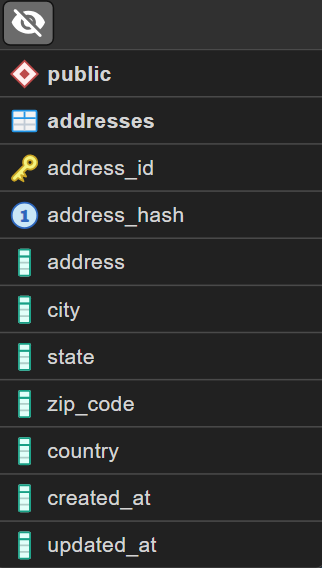

Here we are interested in all attributes except "created_at" and "updated_at" as these columns will be defined at the database level (timestamp without time zone).

In [2]:
# Data for address table

field_address = ['address_id', 'address_hash', 'address', 'city', 'state', 'zip_code', 'country']

address_csv = pd.DataFrame(columns=field_address)
address_csv

,address_id,address_hash,address,city,state,zip_code,country


In [6]:
# As there will be a lot of id column, I will define a function to reuse later

def generate_id_seq() -> list:
    return [id_ for id_ in range(1, number_of_users + 1)]

In [4]:
import hashlib

number_of_users = 100
# For this example as we have one-to-one relationship between user_id and address_id and
# I will make unique constraint later, the address row has to be created first before a users row, they must be equal 

address_csv['address_id'] = generate_id_seq()
address_csv['address_hash'] = [fake.sha256() for _ in range(number_of_users)]
address_csv['address'] = [fake.address() for _ in range(number_of_users)]
address_csv['city'] = [fake.city() for _ in range(number_of_users)]
address_csv['state'] = [fake.county() for _ in range(number_of_users)]
address_csv['zip_code'] = [fake_us.postalcode() for _ in range(number_of_users)]
address_csv['country'] = [fake.country() for _ in range(number_of_users)]

#

address_csv

,address_id,address_hash,address,city,state,zip_code,country
0,1,49bb8f819d50cf568156da793caf394049c52dea00b00e...,Flat 19x\nNorton plaza\nPort Catherine\nTR5 1BN,North Jake,Clackmannanshire,46169,Namibia
1,2,eb607d3a959b6250508b47417c49c13067311efc59da55...,477 Fletcher trail\nKimberleyton\nLU32 1RT,Joestad,Cambridgeshire,30273,Mayotte
2,3,37d2879adee6ea6bf900b9877d69d3fba239a19fb0b50d...,Flat 06H\nEric rapids\nPort Emily\nSP8 2DT,West Mary,Argyll and Bute,35818,Lao People's Democratic Republic
3,4,0ff614aa8fb001552e05469e1703c52c07bdf0c4b9fb64...,Studio 12\nBarry centers\nColemanberg\nLL0 6XL,North Jakeville,Merseyside,27449,Hong Kong
4,5,87c9d2c0d7c2e437cf1174410ff24b307fe3feb24f5e5e...,Flat 2\nAbigail rest\nFionamouth\nWA3 0NN,Clarkfort,Inverclyde,89606,Bahamas
...,...,...,...,...,...,...,...
95,96,2593aa2a7a8bfed37fc671db11fbe13f77709ac8d60d10...,29 Marian forges\nDaviesland\nE3 3XP,North Susan,Hertfordshire,72263,Chile
96,97,6f2d347b668a600e947824c76be35a4de10fe76774bcc0...,21 Jason alley\nRileystad\nB0E 7TW,Kyleville,Renfrewshire,70124,Sudan
97,98,b93d1e978a7900458ffcc356cb540ea5b809dc0799e61c...,Flat 14k\nRowley terrace\nJacobhaven\nB6 2BR,Lake Gerald,Worcestershire,66803,Ireland
98,99,bd619d7396b4e9201242d09d9b1ad23110d816e410ba48...,1 Nigel manor\nBerryville\nN0G 3ZY,North Geoffrey,Derry and Londonderry,86293,Cocos (Keeling) Islands


## Generating Random Users Table Data

#### You can see Users table attributes as per ERD below

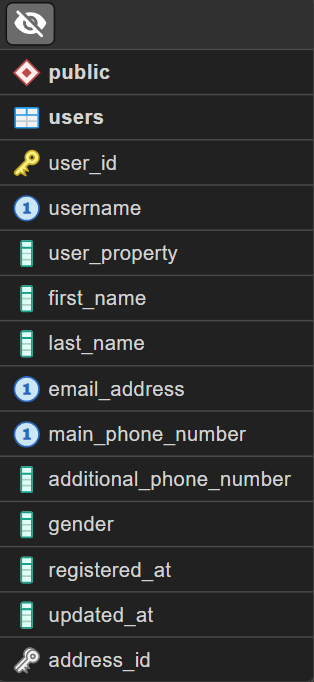

In [7]:
# Data for Users Table

field_names = ['user_id', 'address_id', 'username', 'user_type', 'first_name', 'last_name', 'email_address',
               'main_phone_number',
               'optional_phone_number', 'gender']

users_csv = pd.DataFrame(columns=field_names)
users_csv

,user_id,address_id,username,user_type,first_name,last_name,email_address,main_phone_number,optional_phone_number,gender


In [9]:
number_of_users = 100
# For this example as we have one-to-one relationship between user_id and address_id and
# I will make unique constraint later, the address row has to be created first before a users row, they must be equal 

users_csv['user_id'] = generate_id_seq()
users_csv['address_id'] = generate_id_seq()
users_csv['username'] = [fake.user_name() for _ in range(number_of_users)]
users_csv['user_type'] = [random.choice(['r', 'b']) for _ in range(number_of_users)]
users_csv['first_name'] = [fake.first_name() for _ in range(number_of_users)]
users_csv['last_name'] = [fake.last_name() for _ in range(number_of_users)]
users_csv['email_address'] = [fake.email() for _ in range(number_of_users)]
users_csv['main_phone_number'] = [fake.phone_number() for _ in range(number_of_users)]
users_csv['optional_phone_number'] = [random.choice([fake.phone_number(), None]) for _ in range(number_of_users)]
users_csv['gender'] = [random.choice(['male', 'female', 'other', 'unknown']) for _ in range(number_of_users)]

# users_csv.to_csv('users.csv', index=True)
users_csv

## Generating Random Vehicle Table Data

Here we cannot use random data from faker, so I have a nested json file containing car brands and model which needs to be parsed to csv.

As an advertisement needs vehicle id, I decided to create realistic cars. And based on this csv file
I will inject this data into Postgres and when you need to create a new advertisement manually in python via sqlalhemy transactions, you can choose among existing cars in the database, thus restricting a user from creating a fake cars like 'Bugadata'.

Note that even though some models may have types like 'BMW Series 4 "420"' where 420 is a type.
The csv file will only contain brand and models, but if a type exists it will be concatenated with a model.

In [3]:
import json

cars_json = 'cars.json'

with open(cars_json) as cars_file:
    data = json.load(cars_file)
    

brands = []
models = []

# Extracting data from json to arrange it into csv
for car in data['cars']:
    brand = car.get('brand')
    models_data = car.get('models', [])
    if models_data:
        for model in models_data:
            types_data = model.get('types', [])
            if types_data:
                for t in types_data:
                    brands.append(brand)
                    models.append(str(model.get('title')) + " " + t)
            else:
                brands.append(brand)
                models.append(model.get('title'))
    else:
        brands.append(brand)
        models.append("None")

if not len(brands) == len(models):
    raise ValueError("Brands and Models combinations do not match up")

# Since there are a lot of cars driven by only combustion engines, the category will be 1.

carframe = pd.DataFrame({"vehicle_id": [i for i in range(1, 1820)], "brand": brands, "model": models ,"category_id": [1 for i in range(1, 1820)]})


# carframe.to_csv('vehicles.csv', index=True)
carframe

,vehicle_id,brand,model,category_id
0,1,Abarth,500,1
1,2,Abarth,500C,1
2,3,Abarth,595,1
3,4,Abarth,595C,1
4,5,Abarth,695,1
...,...,...,...,...
1814,1815,Wiesmann,MF 3,1
1815,1816,Wiesmann,MF 30,1
1816,1817,Wiesmann,MF 35,1
1817,1818,Wiesmann,MF 4,1


## Generating Random Advertisement Table Data

#### You can see Advertisements table attributes as per ERD below, it's quite long)

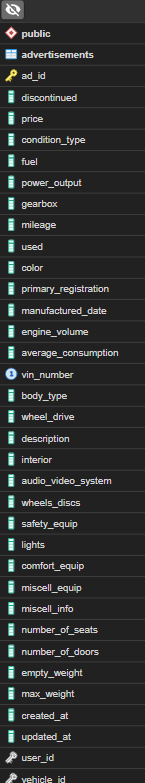

In [64]:
# Data for Advertisements Table

number_of_advertisements = 100

# field_advertisements = ['ad_id', 'user_id', 'vehicle_id', 'discontinued', 'price', 'condition_type','fuel', 'power_output', 'gearbox', 'mileage',
#              'used','color', 'primary_registration', 'manufactured_date','engine_volume', 'average_consumption', 
#              'vin_number', 'body_type', 'wheel_drive', 'description', 'interior','audio_video_system', 'wheels_discs',
#              'safety_equipment', 'lights', 'comfort_equipment', 'miscell_equipment', 'miscell_info', 'number_of_seats',
#              'number_of_doors', 'empty_weight', 'max_weight']

# These are all needed attributes, but since many of them are optional, it's better to skip them.

# Now that we know there are 1819 different cars, so we can set vehicle_id to be between 1 and 1819.

field_advertisements = ['ad_id', 'user_id', 'vehicle_id', 'discontinued', 'price', 'condition_type', 'fuel',
                        'power_output', 'gearbox', 'mileage', 'used', 'color', 'primary_registration',
                        'manufactured_date', 'engine_volume', 'average_consumption', 'vin_number']

advertisements_csv = pd.DataFrame(columns=field_advertisements)

advertisements_csv['ad_id'] = generate_id_seq()
advertisements_csv['user_id'] = generate_id_seq()
advertisements_csv['vehicle_id'] = [random.randint(1, 1819) for _ in range(number_of_advertisements)]
advertisements_csv['discontinued'] = [random.choice([True, False]) for _ in range(number_of_advertisements)]
advertisements_csv['price'] = [random.randint(4000, 60000) for _ in range(number_of_advertisements)]
advertisements_csv['condition_type'] = [random.choice(['used', 'new']) for _ in range(number_of_advertisements)]
advertisements_csv['fuel'] = [random.choice(['diesel', 'petrol']) for _ in range(number_of_advertisements)]
advertisements_csv['power_output'] = [random.randint(80, 190) for _ in range(number_of_advertisements)]
advertisements_csv['gearbox'] = [random.choice(['manual', 'automatic']) for _ in range(number_of_advertisements)]
advertisements_csv['mileage'] = [random.randint(0, 150000) for _ in range(number_of_advertisements)]
advertisements_csv['used'] = [random.choice([True, False]) for _ in range(number_of_advertisements)]
advertisements_csv['color'] = [fake_us.safe_color_name() for _ in range(number_of_advertisements)]
advertisements_csv['primary_registration'] = [fake_us.past_date(start_date='-700d') for _ in
                                              range(number_of_advertisements)]

advertisements_csv['manufactured_date'] = [fake_us.date_time_this_decade() for _ in range(number_of_advertisements)]
advertisements_csv['engine_volume'] = [float(random.randint(1, 3) + random.choice(
    [0.1,0.2,0.3,0.4,0.5,0.6,0.7])) for _ in range(number_of_advertisements)]

advertisements_csv['average_consumption'] = [float(random.randint(5, 14)) for _ in range(number_of_advertisements)]
advertisements_csv['vin_number'] = [fake.vin() for _ in range(number_of_advertisements)]


advertisements_csv

,ad_id,user_id,vehicle_id,discontinued,price,condition_type,fuel,power_output,gearbox,mileage,used,color,primary_registration,manufactured_date,engine_volume,average_consumption,vin_number
0,1,1,1106,False,40359,new,petrol,181,automatic,55830,True,black,2022-05-18,2020-03-11 06:33:46,1.3,9.0,N6FGKP829JV9J8NWJ
1,2,2,661,True,9490,new,diesel,174,manual,35127,True,maroon,2022-07-02,2024-01-28 17:25:42,1.1,13.0,CUGKUN089WRGLCDSS
2,3,3,1257,True,11700,used,diesel,95,manual,115044,False,teal,2023-03-06,2020-07-13 05:38:03,1.1,11.0,MHDC6LVH4GAYDTPEZ
3,4,4,426,False,5110,new,petrol,164,manual,45236,True,maroon,2022-09-08,2020-07-28 02:32:41,1.6,8.0,T04396RJ0V4VG7P23
4,5,5,1683,False,24723,new,petrol,166,manual,142478,False,purple,2023-10-28,2023-03-12 10:55:50,3.3,13.0,R75CS7NDXZ5YZEAE9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,96,153,False,27308,used,diesel,175,automatic,89092,False,yellow,2023-06-27,2021-04-06 21:33:07,3.2,10.0,PUUUYAEJ6XTS30PE1
96,97,97,1601,True,41436,new,diesel,165,automatic,20028,True,maroon,2022-08-27,2023-06-24 19:43:14,1.5,14.0,XT3WH6DK5JDZUUJ32
97,98,98,754,True,33941,used,diesel,165,manual,85692,True,maroon,2022-09-11,2022-07-03 13:11:17,2.6,8.0,P7TW3M5B72JE2YS4D
98,99,99,644,True,13112,new,diesel,83,manual,51750,True,black,2024-01-03,2022-05-03 05:34:57,3.2,5.0,S2JYAYTU0V8Y59L2N
